## Manos a la obra

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# cargando nuestros datos

In [3]:
df = pd.read_csv('data/sales_data.csv')
df.head()

<ipython-input-3-641b43f04074>:1: DtypeWarning: Columns (1,3,4,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/sales_data.csv')


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;50
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401;;;
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088;;;
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418;;;


In [4]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

<ipython-input-4-28a9960ef71d>:1: DtypeWarning: Columns (1,3,4,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])


# Los datos de un vistazo

**aqui presenta el marco de datos que hemos creado**


In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;50
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401;;;
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088;;;
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418;;;


**la forma de nuestro marco de datos nos dice cuantas filas y cuantas columnas tenemos**

In [ ]:
sales.shape

(113036, 18)

**primero haremos una informacion para comprender rapidamente las columnas con las que estamos trabajando:**

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

**las propiedades estadisticas de este marrco de datos con un metodo de descrpcion**





In [ ]:
sales.describe()


,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


# Análisis numérico y visualización

**Analizaremos la columna unit_cost**

In [ ]:
sales['Unit_Cost'].describe()

,Unit_Cost
count,113036.000000
mean,267.296366
std,549.835483
min,1.000000
25%,2.000000
50%,9.000000
75%,42.000000
max,2171.000000


**la media y la mediana o los campos estan listos para esto**

In [ ]:
sales['Unit_Cost'].mean()

267.296365759581

In [ ]:
sales['Unit_Cost'].median()


9.0

**crearemos un diagrama de cajas para el costo unitario**

<Axes: >

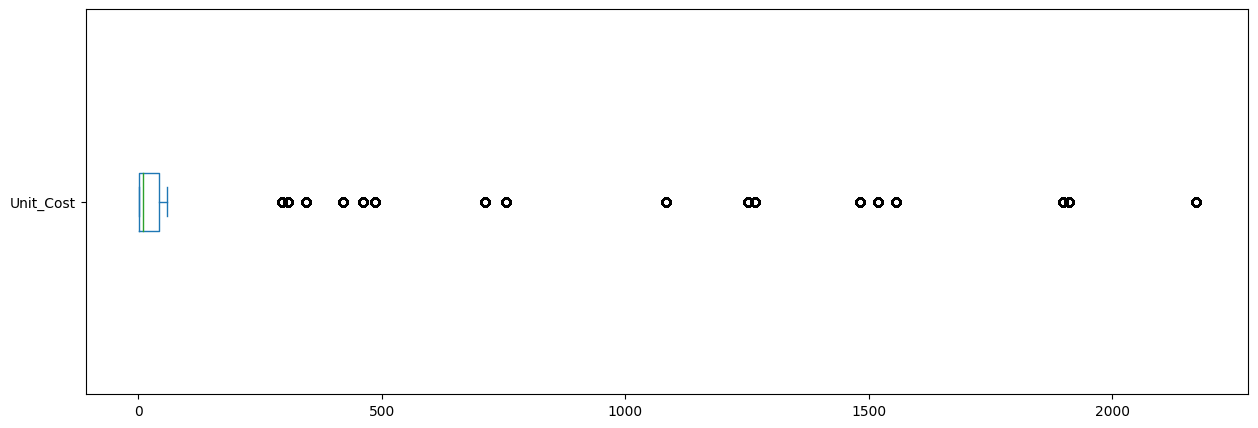

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(15, 5))

**hacemos un grafico de densidad y vemos que al rededor de los $500 se considera un valor atipico**

<Axes: ylabel='Density'>

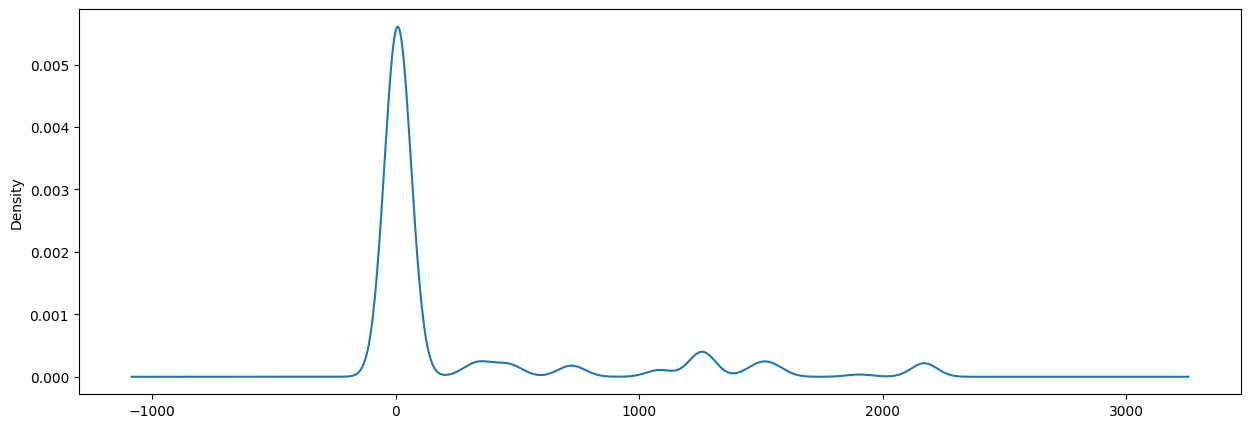

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(15, 5))


**vamos a dibujar dos graficos donde vamos a representar la media y la mediana justo en el grafico de distribucion**



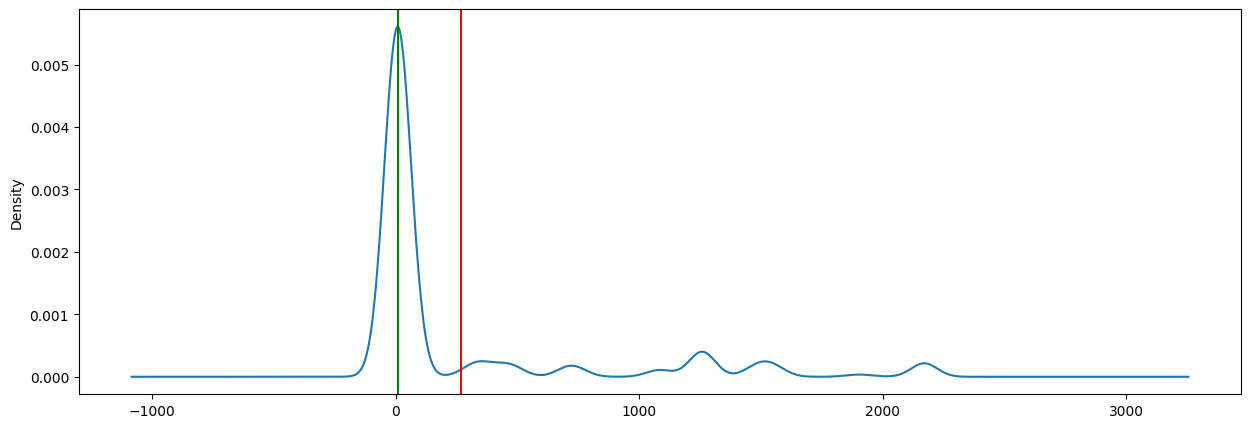

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(15, 5))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

**haremos un histograma rapido de los costos de nuestros productos**

Text(0.5, 0, 'dollars')

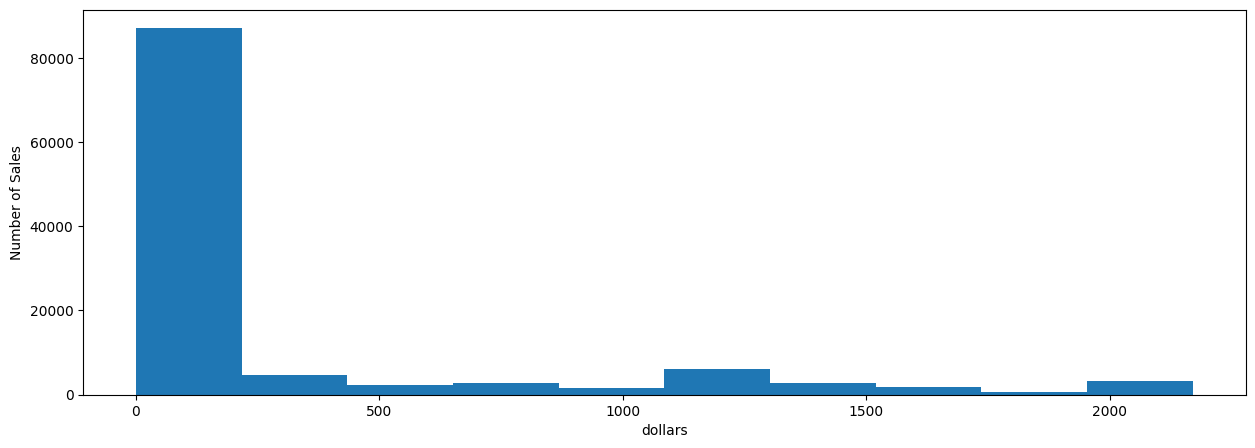

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(15, 5))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

# Análisis y visualización categórica

**Analizaremos la columna Age_Group**

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales['Age_Group'].value_counts()

,count
Age_Group,
Adults (35-64),55824
Young Adults (25-34),38654
Youth (<25),17828
Seniors (64+),730


**obtener un grafico circular de las edades presentadas anteriormente**

<Axes: ylabel='count'>

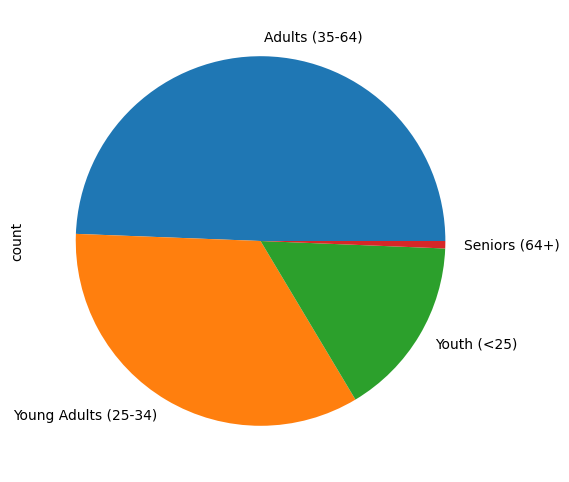

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6, 6))

ob**tener un grafico de barras sobre las edades y grupos de edades**

Text(0, 0.5, 'Number of Sales')

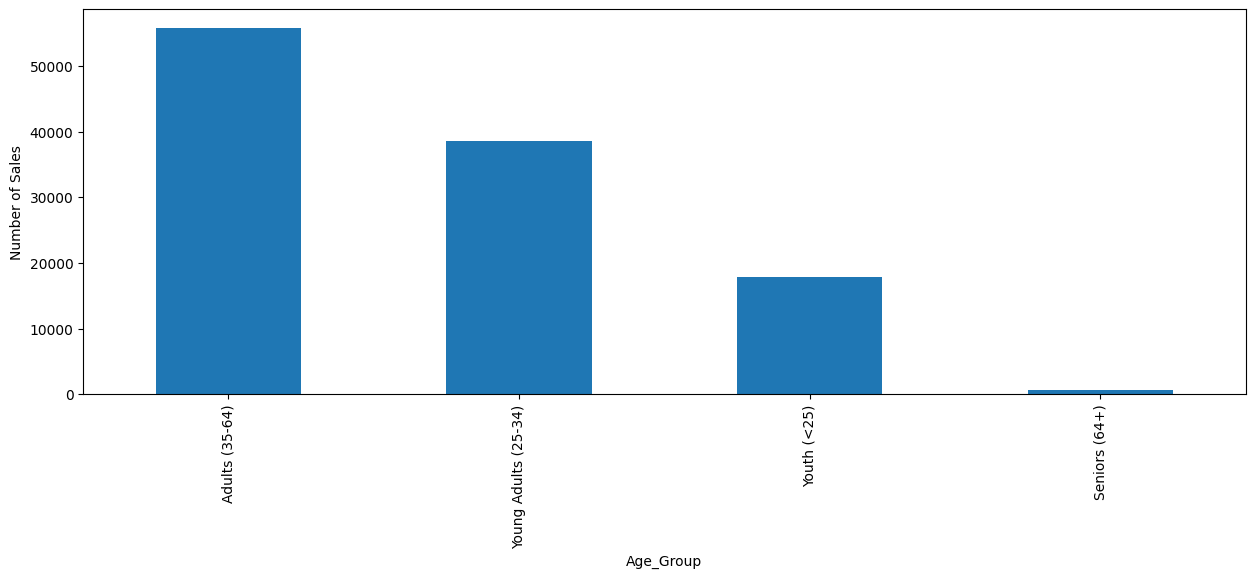

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(15, 5))
ax.set_ylabel('Number of Sales')


# Relación entre las columnas

¿**Podemos encontrar alguna relación significativa?**

In [ ]:
corr=sales.corr(numeric_only=True)
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


**hacemos una matriz de derecho de correlacion que muestra en rojo una correlacion alta**

([<matplotlib.axis.YTick at 0x7cc408f63400>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

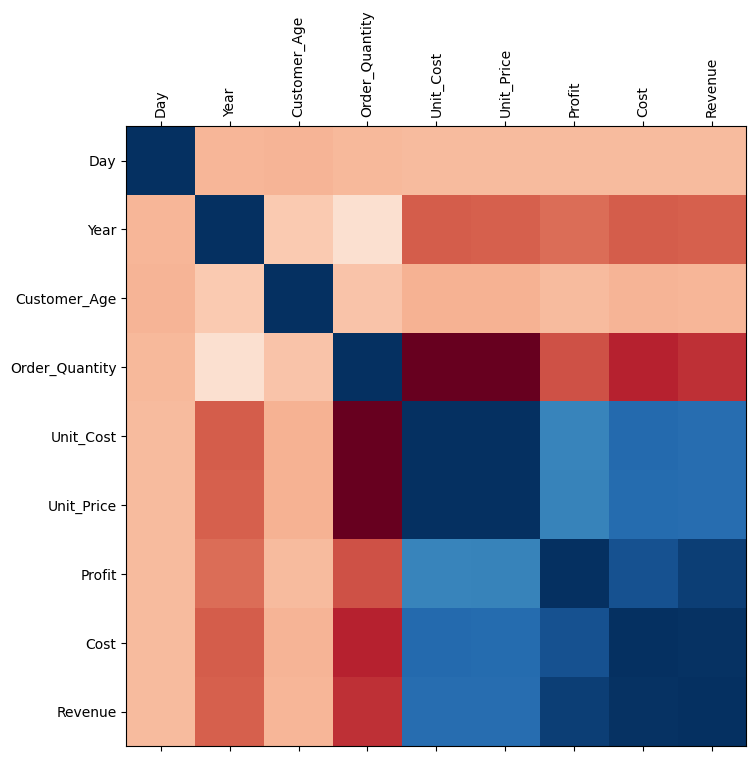

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns)


**tambien podemos hacer un diagrama de dispersion rapido para analizar la edad del cliente y el derecho de ingresos para ver si existe una correlacion alli**

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

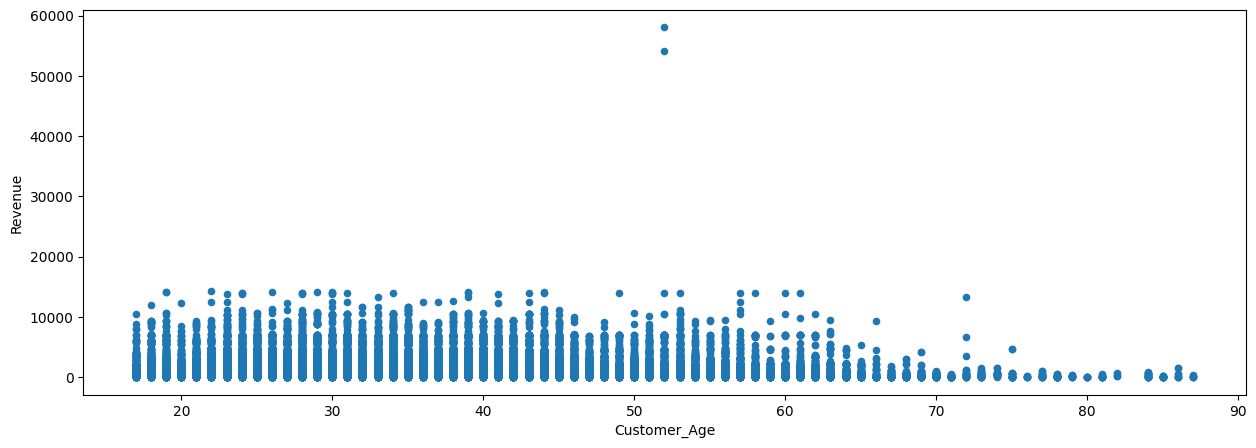

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(15, 5))

**podemos dibujar una diagonal, por lo que existe mucha dependencia lineal**

---



<Axes: xlabel='Revenue', ylabel='Profit'>

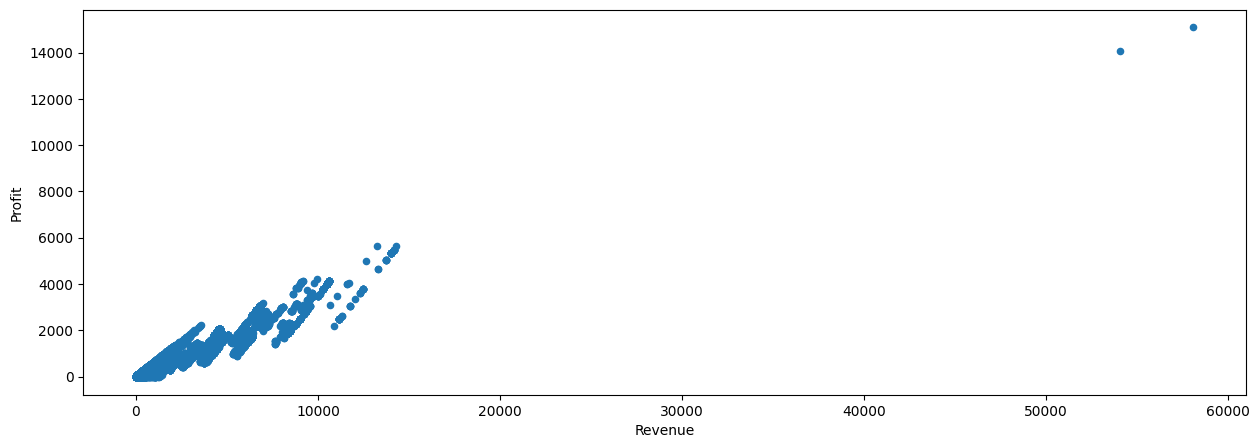

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(15, 5))

**formamos algunos diagramas de cajas mas en este caso entendiendo la ganancia del grupo de edad**

Text(0, 0.5, 'Profit')

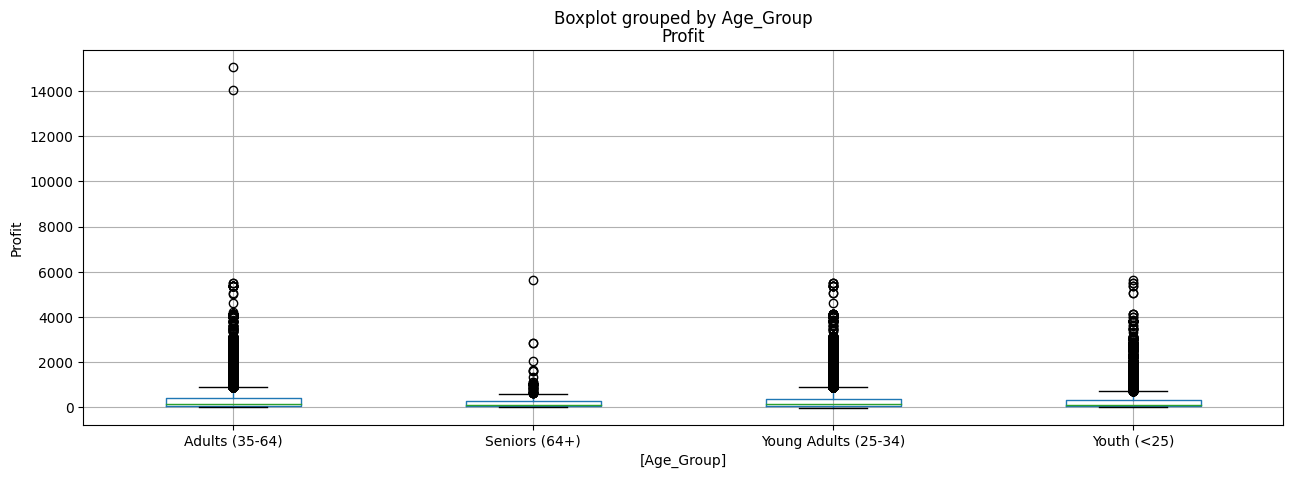

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(15, 5))
ax.set_ylabel('Profit')

**creamos algunos diagramas de caja mas, y los estamos creando en estos grados de años, edad del cliente, unidad, cosotos**

,0
Year,"Axes(0.125,0.53;0.227941x0.35)"
Customer_Age,"Axes(0.398529,0.53;0.227941x0.35)"
Order_Quantity,"Axes(0.672059,0.53;0.227941x0.35)"
Unit_Cost,"Axes(0.125,0.11;0.227941x0.35)"
Unit_Price,"Axes(0.398529,0.11;0.227941x0.35)"
Profit,"Axes(0.672059,0.11;0.227941x0.35)"


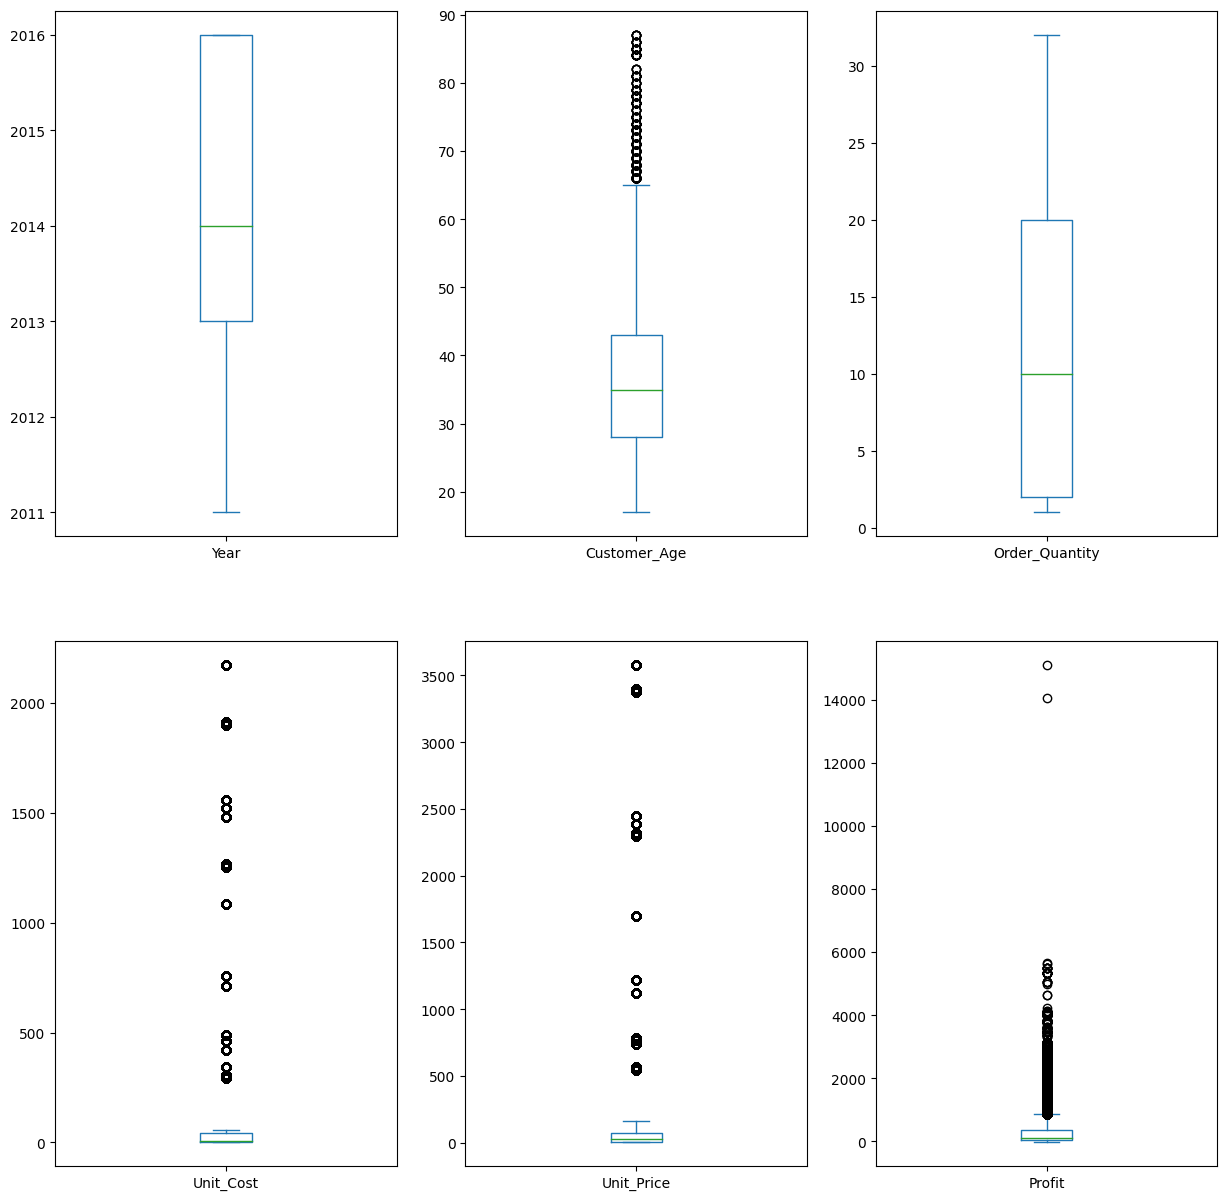

In [ ]:
boxplot_cols =['Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 15))

# **Disputa de columnas**

**También podemos crear nuevas columnas o modificar las existentes**.

# **Agregar y calcular una nueva columna Revenue_per_Age**

In [ ]:
sales['Rvenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Rvenue_per_Age'].head()

,Rvenue_per_Age
0,50.000000
1,50.000000
2,49.000000
3,42.612245
4,8.893617


**podemos trazar un grafico de densidad con estos datos**

<Axes: ylabel='Density'>

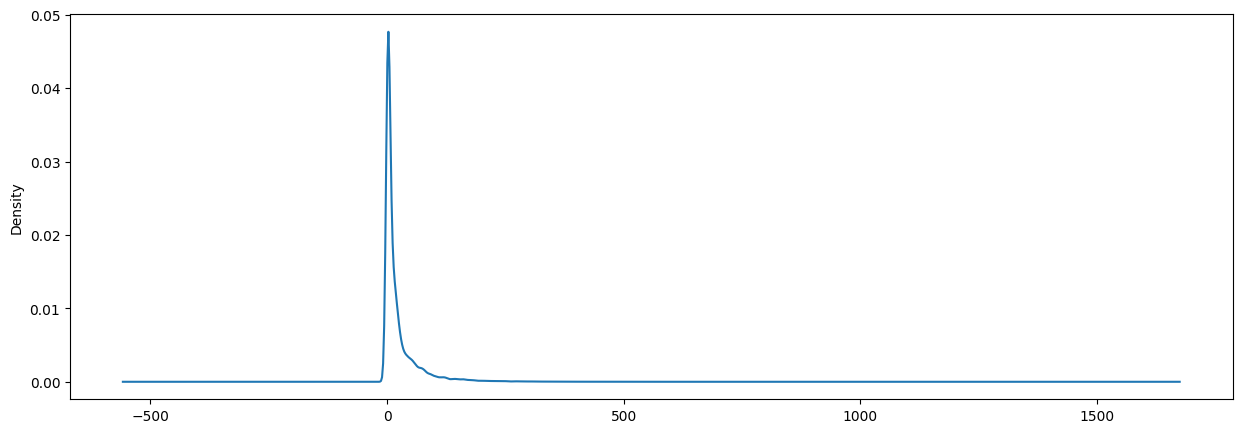

In [ ]:
sales['Rvenue_per_Age'].plot(kind='density', figsize=(15, 5))

**podemos trazar tambien un histograma**

<Axes: ylabel='Frequency'>

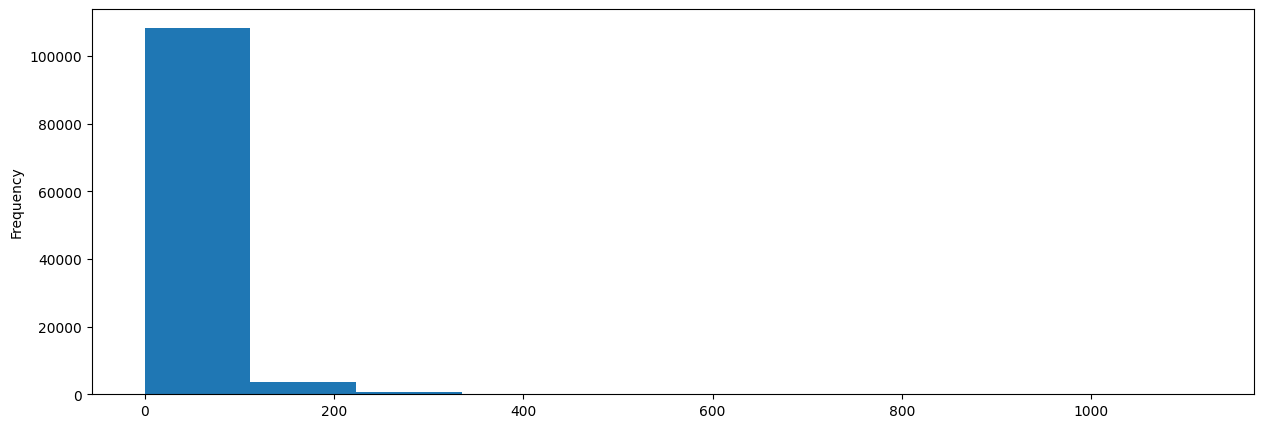

In [ ]:
sales['Rvenue_per_Age'].plot(kind='hist', figsize=(15, 5))

# agregar y calcular una nueva columna Calculated_Cost

**Utilice esta fórmula**

Calculated_Cost = Order_Quantity* Unit_Cost

vamos a crear una nueva columna, que es el costo calculado es el total, es el total de los pedidos, el total de la catidad de pedidos, multiplicado por el costo

In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

,Calculated_Cost
0,360
1,360
2,1035
3,900
4,180


luego vemos cuantas filas tenian un valor diferente lo que sale 0

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

Podemos ver la relación entre el costo y la ganancia usando un diagrama de dispersión.

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

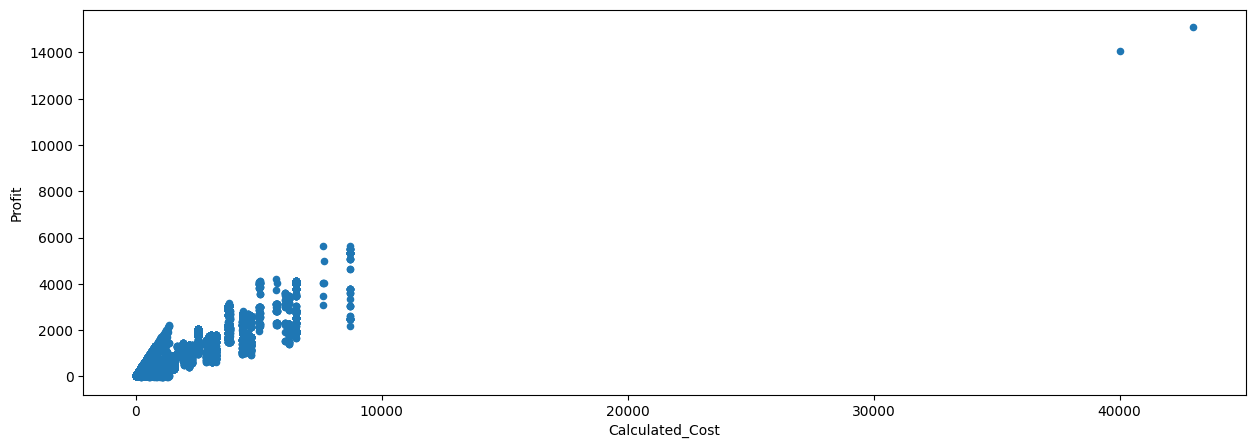

In [ ]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(15, 5))

# Agregar y calcular una nueva columna Calculated_Revenue

Utilice esta fórmula

**Calculated_Revenue = Cost+Profit**

In [ ]:
sales = pd.read_csv('data/sales_data.csv')
sales.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/sales_data.csv'

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

NameError: name 'sales' is not defined